In [1]:
import pandas as pd
import scipy as sp
import matplotlib
import matplotlib.colors as mcolors
import pickle 
from collections import Counter
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import fcluster, to_tree, dendrogram, linkage
import math
from scipy.spatial.distance import squareform
import numpy as np
import networkx as nx
from graspologic.match import graph_match
from sklearn import datasets, manifold
from matplotlib.pyplot import cm
import seaborn as sns
from adjustText import adjust_text
from matplotlib.gridspec import GridSpecFromSubplotSpec, GridSpec
from pathlib import Path


/Users/ssm47/opt/anaconda3/envs/thesis_env/lib/python3.9/site-packages/graspologic/layouts/colors.py:13: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
/Users/ssm47/opt/anaconda3/envs/thesis_env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# nb_name = '991_nhood_overlap_figs'
# save_things=False

datadate = '20231124'

nb_name = '08_overlap_stats'

cwd = Path.cwd()
save_things=False
if save_things:
    fig_dir = cwd.parent / 'figures' / nb_name
    fig_dir.mkdir(parents=True, exist_ok=True)

In [3]:
vnc_edges = pd.read_csv(f'../../data/vnc/{datadate}_data/manc_edges_{datadate}.csv', index_col=0)

vnc_edges = vnc_edges.groupby(['bodyId_pre', 'bodyId_post'], as_index=False).weight.sum()
vnc_edges.rename(columns={'bodyId_pre':'pre', 'bodyId_post':'post'}, inplace=True)
vnc_meta = pd.read_csv(f'../../data/vnc/{datadate}_data/manc_meta_{datadate}.csv', index_col=0)
vnc_edges.loc[:,'attr'] = vnc_edges.weight.apply(lambda x: {'weight':x})


vnc_meta.bodyId = vnc_meta.bodyId.astype('str')

# vnc_edges.pre = vnc_edges.pre.astype('str')
# vnc_edges.post = vnc_edges.post.astype('str')

heminames = ['07B', '11A', '11B', '02A', '18B', '12A', '01A', '10B', '06A', \
             '06B', '19A', '21A', '03B', '23B', '12B', '13B', '05B', '20A.22A', \
             '08A', '09A']

n_ids = list(set(vnc_meta[(vnc_meta['hemilineage'].isin(heminames))].bodyId.values)) # the integers have the numpy.int64 datatype!
n_ids = sorted(n_ids)

# nhood matching statistics:

from 14_full_vnc_gmd_slice.ipynb


In [4]:
nhood_ntype_match_df  = pd.read_parquet(f'../../data/vnc/{datadate}_data/14_full_vnc_gmd_slice/func_hemi_hi_ntype_overlap_stats.parquet')

In [5]:
# nhood_ntype_match_df.id_1 = nhood_ntype_match_df.id_1.astype(str)
# nhood_ntype_match_df.id_2 = nhood_ntype_match_df.id_2.astype(str)

# cols = ['bodyId','class', 'hemilineage']
# nhood_ntype_match_df = nhood_ntype_match_df.set_index('id_1').join(vnc_meta[cols].set_index('bodyId').add_suffix('_id_1')).reset_index().set_index('id_2').join(vnc_meta[cols].set_index('bodyId').add_suffix('_id_2')).reset_index()

# nhood_ntype_match_df['class_match'] = nhood_ntype_match_df['class_id_1'] == nhood_ntype_match_df['class_id_2']
# nhood_ntype_match_df['hemilineage_match'] = nhood_ntype_match_df['hemilineage_id_1'] == nhood_ntype_match_df['hemilineage_id_2']

In [6]:
# sns.histplot(nhood_ntype_match_df[nhood_ntype_match_df['ntype_overlap']>32], x='numeric_match_score', hue='ego_match', stat='density', multiple='stack')
# plt.xlabel('Match %', size=20)
# plt.ylabel('Density', size=20)
# plt.xticks(size=15)
# plt.yticks(size=15)
# plt.yticks([0,1,2,])
# plt.title(r'Overlap $ \geq 33$', size=25)
# # plt.savefig(f'./figures/VNC/{datadate}/14_full_vnc_gmd_slice/ego_match_stats_above33.png', dpi=200, bbox_inches='tight')
# plt.xlim([-0.05, 1.05])
# plt.ylim([0, 2.3])

# plt.show()

In [7]:
# sns.histplot(nhood_ntype_match_df[nhood_ntype_match_df['ntype_overlap']<33], x='numeric_match_score', hue='ego_match', stat='density', multiple='stack')
# # plt.legend(loc='upper left')
# plt.xlabel('Match %', size=20)
# plt.ylabel('Density', size=20)
# plt.xticks(size=15)
# plt.yticks(size=15)
# plt.yticks([0,1,2])
# plt.title(r'$25 < $ Overlap $< 33 $', size=25)
# plt.xlim([-0.05, 1.05])
# plt.ylim([0, 2.3])

# # plt.savefig(f'./figures/VNC/{datadate}/14_full_vnc_gmd_slice/ego_match_stats_below33.png', dpi=200, bbox_inches='tight')

# plt.show()

In [8]:
frow_datas = [nhood_ntype_match_df[nhood_ntype_match_df['ntype_overlap']<33].copy(True), nhood_ntype_match_df[nhood_ntype_match_df['ntype_overlap']>32].copy(True)]
# frow_plotobj = []



# statistical tests for matching:


In [9]:
trials = nhood_ntype_match_df[['id_1', 'id_2']].to_numpy()

match_pval_stats = pd.read_parquet(f'../../data/vnc/{datadate}_data/14_full_vnc_gmd_slice/match_pval_stats.parquet')

match_pval_stats['numeric_match_score'] = match_pval_stats['matching_n'] /match_pval_stats['ntype_overlap'] 
match_pval_stats['null_numeric_match_score'] = match_pval_stats['average_matched'] /match_pval_stats['ntype_overlap'] 

In [10]:
pval_data = [match_pval_stats[match_pval_stats['ntype_overlap']<33].copy(True), match_pval_stats[match_pval_stats['ntype_overlap']>32].copy(True)]

# Combined figures

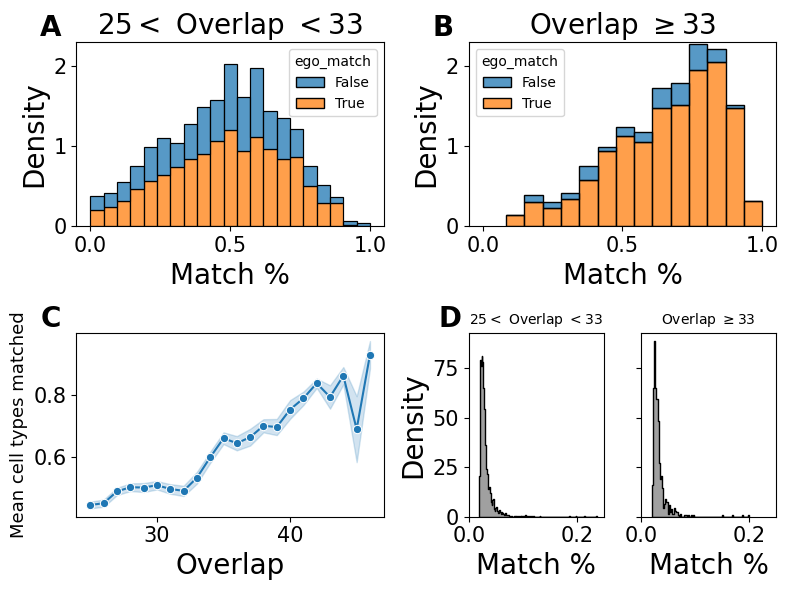

In [11]:
fig = plt.figure(figsize=(8, 6))
gs = GridSpec(2, 2, figure=fig)  # 2x2 grid
gs1 = GridSpecFromSubplotSpec(nrows=1, ncols=2, subplot_spec=gs[1,1])

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs1[0])
ax5 = fig.add_subplot(gs1[1], sharey=ax4)

for ax, data, title in zip([ax1, ax2], frow_datas, [r'$25 < $ Overlap $< 33 $', r'Overlap $ \geq 33$']):
    sns.histplot(data,\
                 x='numeric_match_score',\
                 hue='ego_match',\
                 stat='density',
                 multiple='stack',  
                 ax=ax)
# plt.legend(loc='upper left')
    ax.set_xlabel('Match %', size=20)
    ax.set_ylabel('Density', size=20)
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)
    ax.set_yticks([0, 1, 2])
    ax.set_title(title, size=20)
    ax.set_xlim([-0.05, 1.05])
    ax.set_ylim([0, 2.3])
sns.lineplot(data=nhood_ntype_match_df, 
             x="ntype_overlap", 
             y="numeric_match_score", 
             marker='o', 
             errorbar="se", ax=ax3)
ax3.set_xlabel('Overlap', size=20)
ax3.set_ylabel('Mean cell types matched', size=13)
ax3.tick_params(axis='x', labelsize=15)
ax3.tick_params(axis='y', labelsize=15)

for ax, data, title in zip([ax4, ax5], pval_data, [r'$25 < $ Overlap $< 33 $', r'Overlap $ \geq 33$']):
    sns.histplot(data, 
                 x='null_numeric_match_score', 
                #  hue='ego_match', 
                 stat='density',
                 ax=ax,
                 multiple='stack',
                 element='step', color='grey')
    ax.set_xlabel('Match %', size=20)
    ax.set_ylabel('Density', size=20)
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)
    ax.set_xlim([0, 0.25])

    ax.set_title(title, size=10)

ax5.tick_params('y', labelleft=False)
ax5.set_ylabel('')


for ax, text in zip([ax1,ax2,ax3,ax4], 'ABCD'):
    ax.text(-0.05, 1, text, transform=ax.transAxes, fontsize=20, fontweight='bold', va='bottom',  ha='right')
# plt.show()
plt.tight_layout()
# save_things = False
if save_things:
    plt.savefig(f'../figures/{nb_name}/nhood_matching_stats.png', transparent=True, dpi=300, bbox_inches='tight')
    plt.savefig(f'../figures/{nb_name}/nhood_matching_stats.pdf', transparent=True, dpi=300, bbox_inches='tight')

plt.show()